# Choosing optimal number of bins by MSE

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
all_chunk = pd.read_csv('~/data0118/joined_smpl/eskape_GO_smpl_rm_plasmid')
score = 'Score'

In [2]:
all_chunk.shape

(13552, 8)

In [5]:
all_chunk.head()

,Unnamed: 0,gene_one,gene_two,goldstandard,mutual_info,nrm_mutual
0,0,562.22861.con.0021_43|562.22861,562.22936.con.0029_47|562.22936,0,0.009989,0.051208
1,1,562.22861.con.0021_43|562.22861,562.23178.con.0026_54|562.23178,0,0.020734,0.025990
2,2,562.22861.con.0021_43|562.22861,562.23184.con.0019_75|562.23184,0,0.048448,0.061330
3,3,562.22861.con.0021_43|562.22861,562.23283.con.0052_14|562.23283,0,0.003881,0.009851
4,4,562.22861.con.0021_43|562.22861,562.23366.con.0034_15|562.23366,0,0.036965,0.049828


Text(0.5, 1.0, 'Mentha score distribution')

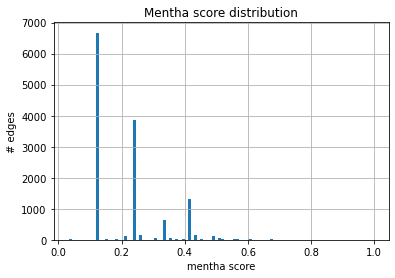

In [5]:
all_chunk[score].hist(bins = 100)
plt.xlabel('mentha score')
plt.ylabel('# edges')
plt.title('Mentha score distribution')

In [6]:
len(all_chunk[score].unique())

73

In [7]:
all_chunk[score].max()

0.997

In [8]:
def evaluate_fitting(lls_score, new_lls):
    ''' return MSE between fit and original score'''
    return np.sum((lls_score.values - new_lls.values)**2)/len(lls_score)

2.0099350566921363
2.2818687721757778
2.2818687721757778
3.485841576501714
3.485841576501714
3.2626980251875044
3.2626980251875044
3.2626980251875044
3.2626980251875044
3.2626980251875044
3.2626980251875044
3.2626980251875044
3.2626980251875044
3.2626980251875044
3.2626980251875044
3.2626980251875044
3.2626980251875044
3.2626980251875044
3.2626980251875044
3.2626980251875044
3.2626980251875044
3.2626980251875044
3.2626980251875044
3.2626980251875044
3.2626980251875044
3.2626980251875044
3.2626980251875044
3.2626980251875044
3.2626980251875044
3.2626980251875044
3.2626980251875044
3.2626980251875044
3.2626980251875044
3.2626980251875044
3.2626980251875044
3.2626980251875044
3.2626980251875044
3.2626980251875044
3.2626980251875044
3.2626980251875044
3.2626980251875044
3.2626980251875044
3.2626980251875044
3.2626980251875044
3.2626980251875044
3.2626980251875044
3.2626980251875044
3.2626980251875044
3.2626980251875044
3.2626980251875044
3.2626980251875044
3.2626980251875044
3.262698025187

Text(0.5, 1.0, 'Determine optimal number of bins')

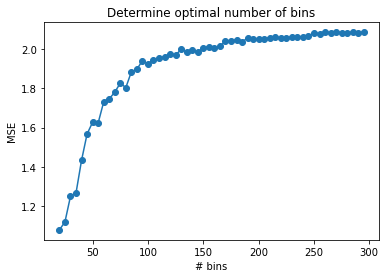

In [9]:
from Genome.goldstandard_pair.lls import *
import numpy as np
import matplotlib.pyplot as plt
bin_to_try = list(np.arange(5,300, 5))
mse = []
for b in bin_to_try:
    
    lls_score = lls_for_other(all_chunk, score, bins = b)
    
    print(lls_score.max())
    
    if lls_score.max()>=3:
    
        true_thres, slope, intercept = lls_regress_thres(lls_score)
    
        new_lls = map_lls(lls_score, true_thres, slope, intercept)
        mse.append(evaluate_fitting(lls_score, new_lls))
    else:
        mse.append(None)
    
plt.plot(bin_to_try, mse, '-o')
plt.xlabel('# bins')
plt.ylabel('MSE')
plt.title('Determine optimal number of bins')

In [10]:
%matplotlib inline

def wrap_for_diff_score(score, all_chunk, bins = 20):
    lls_score = lls_for_other(all_chunk, score, bins = bins)
    print(lls_score.max())
    true_thres, slope, intercept = lls_regress_thres(lls_score)
    new_lls = map_lls(lls_score, true_thres, slope, intercept)
    all_chunk = map_score_to_lls(all_chunk, new_lls, score)
    tradeoff = try_diff_lls_thres(all_chunk)
    return(new_lls, all_chunk,lls_score, tradeoff, true_thres)

In [11]:
new_lls, all_chunk,lls_score, tradeoff, true_thres = wrap_for_diff_score(score, all_chunk, bins = 20)

3.485841576501714


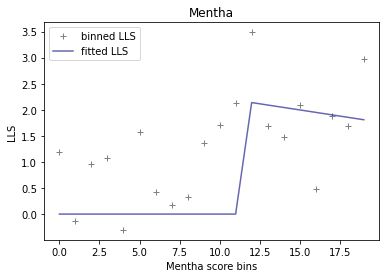

In [12]:
plt.plot(lls_score, '+', label = 'binned LLS', color = 'grey')
plt.plot(new_lls, '-', label = 'fitted LLS', color = 'navy', alpha = 0.6)

plt.title('Mentha')
plt.xlabel('Mentha score bins')
plt.ylabel('LLS')
plt.legend()

In [19]:
sum(all_chunk['lls']>3)

3343